In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap
import umap
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [4]:
data_cls = pd.read_csv('2dataset.csv')
data_cls = data_cls.sample(frac=0.2, random_state=42)
y_cls = data_cls['RainTomorrow']
X_cls = data_cls.drop(['RainTomorrow', 'Date', 'Location'], axis=1)
X_cls = StandardScaler().fit_transform(X_cls)
data_cls[data_cls['RainTomorrow'] == 0].shape, data_cls[data_cls['RainTomorrow'] == 1].shape


((14592, 26), (2804, 26))

In [27]:
data_reg = pd.read_csv('1dataset.csv')
y_reg = data_reg['price']
X_reg = data_reg.drop(['price'], axis=1)
X_reg = StandardScaler().fit_transform(X_reg)
X_reg.shape

(43910, 10)

In [5]:
smote = SMOTE(random_state=42)
X_cls_balanced, y_cls_balanced = smote.fit_resample(X_cls, y_cls)

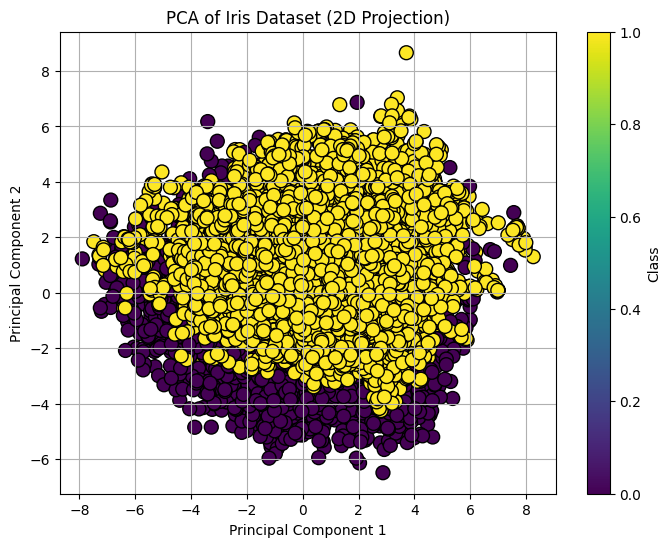

In [ ]:
# Реализация PCA
def pca_from_scratch(X, n_components=2):
    # 1. Центрирование данных
    X_centered = X - np.mean(X, axis=0)
    
    # 2. Вычисление ковариационной матрицы
    cov_matrix = np.cov(X_centered.T)
    
    # 3. Вычисление собственных значений и векторов
    selfvaluers, selfvectros = np.linalg.eigh(cov_matrix)
    
    # 4. Сортировка собственных значений и векторов по убыванию
    idx = np.argsort(selfvaluers)[::-1]
    eigenvalues = eigenvalues[idx]
    selfvectros = selfvectros[:, idx]
    
    # 5. Выбор n_components главных компонент
    top_selfvectros = selfvectros[:, :n_components]
    
    # 6. Проецирование данных
    X_transformed = np.dot(X_centered, top_selfvectros)
    
    return X_transformed

# Применение PCA
X_pca = pca_from_scratch(X_cls_balanced, n_components=2)

# Визуализация
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_cls_balanced, cmap='viridis', edgecolor='k', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset (2D Projection)')
plt.colorbar(scatter, label='Class')
plt.grid(True)

In [15]:
from kmeans_custom import KMeansCustom

kmeans = KMeansCustom(k=2, max_iter=100, random_state=42)
kmeans.fit(X_pca)
labels = kmeans.predict(X_pca)

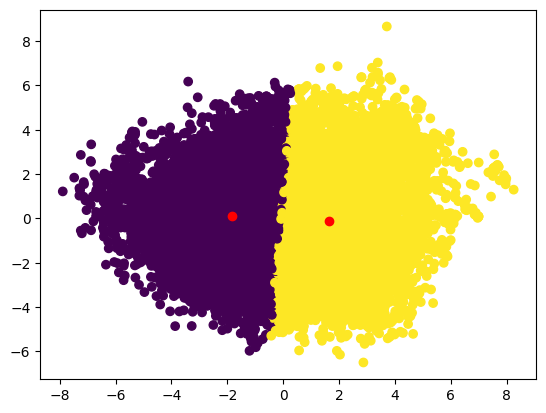

In [16]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
centroids = np.array(kmeans.centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='o')

In [9]:
def test_class(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    svm_rbf = SVC(kernel='rbf', probability=True, random_state=42)
    svm_rbf.fit(X_train, y_train)
    y_pred = svm_rbf.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [25]:
def test_reg(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    y_pred = poly_model.predict(X_test_poly)
    print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
    print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
    print(f'R^2: {r2_score(y_test, y_pred)}')

In [18]:
test_class(X_cls_balanced, y_cls_balanced)

[[2397  515]
 [ 416 2509]]
              precision    recall  f1-score   support

       False       0.85      0.82      0.84      2912
        True       0.83      0.86      0.84      2925

    accuracy                           0.84      5837
   macro avg       0.84      0.84      0.84      5837
weighted avg       0.84      0.84      0.84      5837



In [26]:
test_reg(X_reg, y_reg)

MAE: 349.99888385117094
MSE: 351845.31573685014
RMSE: 593.1655045068368
MAPE: 0.15565863104397804
R^2: 0.937368376046819


# Variance Threshold

Задает минимальную дисперсию, если признак меньше заданной дисперсии, он удаляется

In [29]:
vt = VarianceThreshold(1)
X_vt_cls = vt.fit_transform(X_cls_balanced)
X_vt_cls.shape

(29184, 10)

In [24]:
test_class(X_vt_cls, y_cls_balanced)

[[2283  629]
 [ 611 2314]]
              precision    recall  f1-score   support

       False       0.79      0.78      0.79      2912
        True       0.79      0.79      0.79      2925

    accuracy                           0.79      5837
   macro avg       0.79      0.79      0.79      5837
weighted avg       0.79      0.79      0.79      5837



In [30]:
X_vt_reg = vt.fit_transform(X_reg)
X_vt_reg.shape

(43910, 2)

In [31]:
test_reg(X_vt_reg, y_reg)

MAE: 426.5515398385895
MSE: 456236.6058393554
RMSE: 675.4528894300145
MAPE: 0.1690846313532141
R^2: 0.9187857895144533


# SelectKBest

Выбирает К лучших признаков, с помощью статистических методов, например f_classif

In [ ]:
skb = SelectKBest(score_func=f_classif, k=10)
X_skb_cls = skb.fit_transform(X_cls_balanced, y_cls_balanced)

In [33]:
test_class(X_skb_cls, y_cls_balanced)

[[2228  684]
 [ 541 2384]]
              precision    recall  f1-score   support

       False       0.80      0.77      0.78      2912
        True       0.78      0.82      0.80      2925

    accuracy                           0.79      5837
   macro avg       0.79      0.79      0.79      5837
weighted avg       0.79      0.79      0.79      5837



In [46]:
skb = SelectKBest(k=6)
X_skb_reg = skb.fit_transform(X_reg, y_reg)

In [47]:
test_reg(X_skb_reg, y_reg)

MAE: 383.48084471878724
MSE: 386366.32217541523
RMSE: 621.5837209704057
MAPE: 0.14828711801380448
R^2: 0.9312233270805779


# RFE (рекурсивный отбор признаков)

Обучает модель, оценивает важность признаков и рекурсивно удаляет слабые.

In [ ]:
tree_class = DecisionTreeClassifier().fit(X_cls_balanced, y_cls_balanced)
rfe = RFE(estimator=tree_class, n_features_to_select=10, step=4).fit(X_cls_balanced, y_cls_balanced)
X_rfe_cls = pd.DataFrame(rfe.transform(X_cls_balanced), columns=rfe.get_feature_names_out())

In [ ]:
test_class(X_rfe_cls, y_cls_balanced)

[[2282  630]
 [ 488 2437]]
              precision    recall  f1-score   support

       False       0.82      0.78      0.80      2912
        True       0.79      0.83      0.81      2925

    accuracy                           0.81      5837
   macro avg       0.81      0.81      0.81      5837
weighted avg       0.81      0.81      0.81      5837



In [52]:
tree_reg = DecisionTreeRegressor().fit(X_reg, y_reg)
rfe = RFE(estimator=tree_reg, n_features_to_select=5, step=4).fit(X_reg, y_reg)
X_rfe_reg = pd.DataFrame(rfe.transform(X_reg), columns=rfe.get_feature_names_out())

In [53]:
test_reg(X_rfe_reg, y_reg)

MAE: 355.0752812107644
MSE: 298278.79722996167
RMSE: 546.1490613650834
MAPE: 0.15726252740808022
R^2: 0.9469036970914617


# PCA

Преобразует данные в пространство меньшей размерности, путем нахождения новых ортогональных осей (главных компонент), максимизирующих дисперсию.

In [ ]:
pca = PCA(n_components=10)
X_pca_cls = pca.fit_transform(X_cls_balanced, y_cls_balanced)

In [ ]:
test_class(X_pca_cls, y_cls_balanced)

[[2163  749]
 [ 580 2345]]
              precision    recall  f1-score   support

       False       0.79      0.74      0.76      2912
        True       0.76      0.80      0.78      2925

    accuracy                           0.77      5837
   macro avg       0.77      0.77      0.77      5837
weighted avg       0.77      0.77      0.77      5837



In [60]:
pca = PCA(n_components=5)
X_pca_reg = pca.fit_transform(X_reg, y_reg)

In [61]:
test_reg(X_pca_reg, y_reg)

MAE: 394.93010573797
MSE: 346696.73181788257
RMSE: 588.8095887618362
MAPE: 0.18498117086177873
R^2: 0.9382848701920625


# Kernel PCA

В отличие от PCA использует ядра для отображения в пространство высокой размерности, где применяется PCA

In [63]:
kernels = [
    {'name': 'poly', 'params': {'gamma': 3, 'degree': 3, 'coef0': 1}},
    {'name': 'rbf', 'params': {'gamma': 0.05}},
    {'name': 'sigmoid', 'params': {'gamma': 0.1, 'coef0': 1}}
]

In [52]:
for kernel_config in kernels:
    kernel_name = kernel_config['name']
    params = kernel_config['params']
    
    kpca_2d = KernelPCA(n_components=2, kernel=kernel_name, **params)
    X_kpca_2d = kpca_2d.fit_transform(X_cls_balanced)
    
    kpca_3d = KernelPCA(n_components=3, kernel=kernel_name, **params)
    X_kpca_3d = kpca_3d.fit_transform(X_cls_balanced)
    
    
    print("Результаты для 2D:")
    test_class(X_kpca_2d, y_cls_balanced)
    
    print("Результаты для 3D:")
    test_class(X_kpca_3d, y_cls_balanced)

Результаты для 2D:
[[2465  447]
 [1537 1388]]
              precision    recall  f1-score   support

       False       0.62      0.85      0.71      2912
        True       0.76      0.47      0.58      2925

    accuracy                           0.66      5837
   macro avg       0.69      0.66      0.65      5837
weighted avg       0.69      0.66      0.65      5837

Результаты для 3D:
[[2294  618]
 [1249 1676]]
              precision    recall  f1-score   support

       False       0.65      0.79      0.71      2912
        True       0.73      0.57      0.64      2925

    accuracy                           0.68      5837
   macro avg       0.69      0.68      0.68      5837
weighted avg       0.69      0.68      0.68      5837

Результаты для 2D:
[[2137  775]
 [1254 1671]]
              precision    recall  f1-score   support

       False       0.63      0.73      0.68      2912
        True       0.68      0.57      0.62      2925

    accuracy                           0.65 

In [64]:
for kernel_config in kernels:
    kernel_name = kernel_config['name']
    params = kernel_config['params']
    
    kpca_2d = KernelPCA(n_components=2, kernel=kernel_name, **params)
    X_kpca_2d = kpca_2d.fit_transform(X_reg)
    
    kpca_3d = KernelPCA(n_components=3, kernel=kernel_name, **params)
    X_kpca_3d = kpca_3d.fit_transform(X_reg)
    
    
    print("Результаты для 2D:")
    test_reg(X_kpca_2d, y_reg)
    
    print("Результаты для 3D:")
    test_reg(X_kpca_3d, y_reg)

Результаты для 2D:
MAE: 969.5542456644879
MSE: 1716317.706062468
RMSE: 1310.0830912817964
MAPE: 0.632988513197359
R^2: 0.6944800446606252
Результаты для 3D:
MAE: 969.9374400239467
MSE: 1715745.2395805633
RMSE: 1309.8645882611543
MAPE: 0.6349633066035113
R^2: 0.6945819488321938
Результаты для 2D:
MAE: 679.3840001097873
MSE: 1117134.2548466166
RMSE: 1056.9457199149901
MAPE: 0.26627435842670744
R^2: 0.8011400765468758
Результаты для 3D:
MAE: 630.2774941468899
MSE: 934623.8744159592
RMSE: 966.7594708178241
MAPE: 0.27270119328117937
R^2: 0.8336285622632361
Результаты для 2D:
MAE: 616.9826164376705
MSE: 907298.1484320941
RMSE: 952.5219936736863
MAPE: 0.27029767442950603
R^2: 0.8384927867321192
Результаты для 3D:
MAE: 615.3383194040115
MSE: 902811.6317482905
RMSE: 950.1640025533964
MAPE: 0.2693759514875985
R^2: 0.8392914269675624


# t-SNE

Сохраненяя локальные расстояния между точками, минимизирует расхождение между распределениями расстояний в исходном и новом пространстве.

In [ ]:
tsne = TSNE(n_components=2)
X_tsne_cls = tsne.fit_transform(X_cls_balanced)

In [ ]:
test_class(X_tsne_cls, y_cls_balanced)

[[2010  902]
 [ 817 2108]]
              precision    recall  f1-score   support

       False       0.71      0.69      0.70      2912
        True       0.70      0.72      0.71      2925

    accuracy                           0.71      5837
   macro avg       0.71      0.71      0.71      5837
weighted avg       0.71      0.71      0.71      5837



In [66]:
tsne = TSNE(n_components=2, n_jobs=-1)
X_tsne_reg = tsne.fit_transform(X_reg)

In [67]:
test_reg(X_tsne_reg, y_reg)

MAE: 752.003662109375
MSE: 1104888.0
RMSE: 1051.136527764115
MAPE: 0.39724722504615784
R^2: 0.803320050239563


# isomap

Строит граф соседей, вычисляет кратчайшие пути и применяет многомерное шкалирование.

In [ ]:
isomap = Isomap(n_components=2, n_jobs=-1)
X_isomap_cls = isomap.fit_transform(X_cls_balanced)

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 5 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr

In [ ]:
test_class(X_isomap_cls, y_cls_balanced)

[[2087  825]
 [1469 1456]]
              precision    recall  f1-score   support

       False       0.59      0.72      0.65      2912
        True       0.64      0.50      0.56      2925

    accuracy                           0.61      5837
   macro avg       0.61      0.61      0.60      5837
weighted avg       0.61      0.61      0.60      5837



In [68]:
isomap = Isomap(n_components=2, n_jobs=-1)
X_isomap_reg = isomap.fit_transform(X_reg)

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 15 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a cs

In [69]:
test_reg(X_isomap_reg, y_reg)

MAE: 756.3359730113
MSE: 1230454.7469397855
RMSE: 1109.2586474487298
MAPE: 0.367295548843547
R^2: 0.780968011922099


# umap

Аналогичен t-SNE, но лучше сохраняет структуру, используя оптимизацию.

In [ ]:
umap_model = umap.UMAP(n_components=2, n_neighbors = 50, min_dist = 0.5, metric = 'euclidean', n_jobs=-1)
X_umap_cls = umap_model.fit_transform(X_cls_balanced)

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
test_class(X_umap_cls, y_cls_balanced)

[[2033  879]
 [ 798 2127]]
              precision    recall  f1-score   support

       False       0.72      0.70      0.71      2912
        True       0.71      0.73      0.72      2925

    accuracy                           0.71      5837
   macro avg       0.71      0.71      0.71      5837
weighted avg       0.71      0.71      0.71      5837



In [70]:
umap_model = umap.UMAP(n_components=5, n_neighbors = 50, min_dist = 0.5, metric = 'euclidean', n_jobs=-1)
X_umap_reg = umap_model.fit_transform(X_reg)

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [71]:
test_reg(X_umap_reg, y_reg)

MAE: 563.95263671875
MSE: 698385.5
RMSE: 835.6946212582681
MAPE: 0.2822868824005127
R^2: 0.8756811022758484
